In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs
from mle_toolbox.visualize import visualize_2D_grid
from visualize import imp_plot


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## New ES-LTH Tasks

In [2]:
meta_log, hyper_log = load_result_logs("../experiments/rebuttal/cartpole_sepcma")
hyper_log["imp_config/baseline_name"].unique()

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


array(['final-ticket', 'random-reinit', 'sig2noise'], dtype=object)

In [3]:
def get_perf_env(meta_log, hyper_log):
    """Filter dataframe for environment and popsize."""
    run_id_ticket = hyper_log.filter({"imp_config/baseline_name": "final-ticket"}).run_id.iloc[0]
    run_id_random = hyper_log.filter({"imp_config/baseline_name": "random-reinit"}).run_id.iloc[0]
    run_id_sig2noi = hyper_log.filter({"imp_config/baseline_name": "sig2noise"}).run_id.iloc[0]
    ticket_perf = meta_log[run_id_ticket].stats.final_perf
    random_perf = meta_log[run_id_random].stats.final_perf
    sig2noise_perf = meta_log[run_id_sig2noi].stats.final_perf
    return {"IMP": ticket_perf, "Random": random_perf, "SNR": sig2noise_perf}

[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]


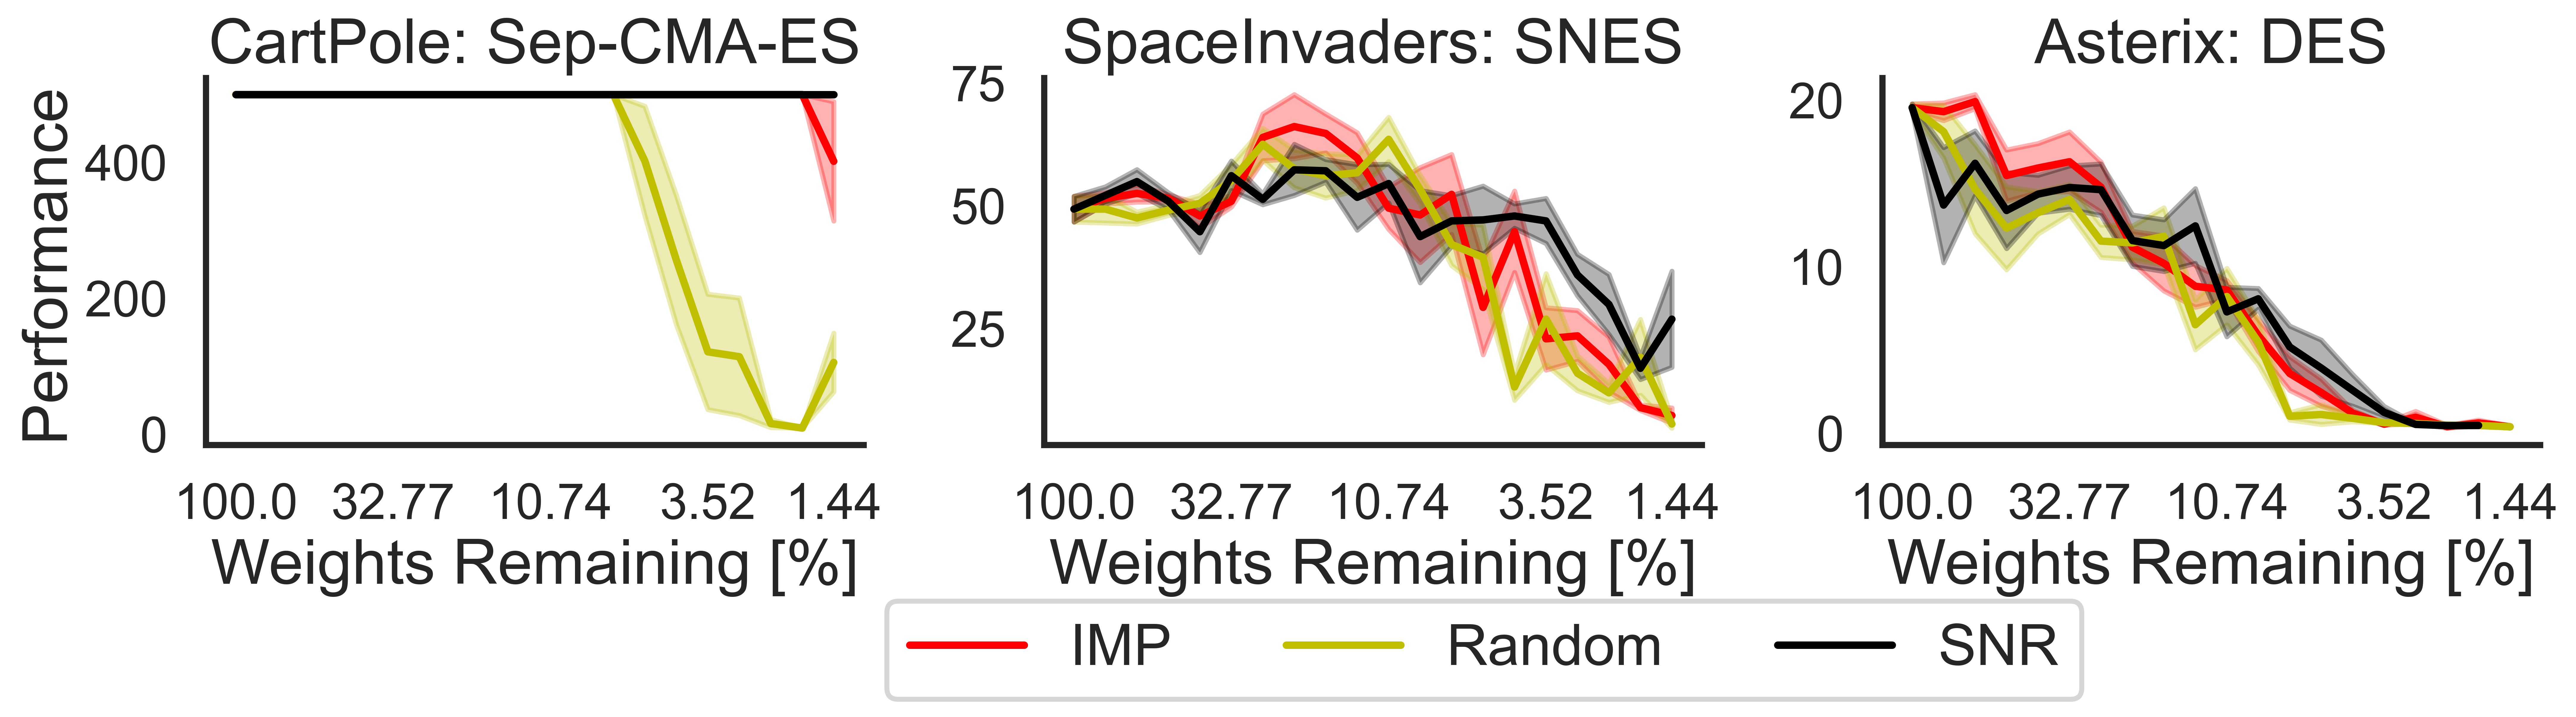

In [4]:
figsize = (15, 4)
fig, axs = plt.subplots(1, 3, figsize=figsize)
labels = [
    'CartPole: Sep-CMA-ES', 'SpaceInvaders: SNES', 'Asterix: DES'
    
]
for i, env_strat in enumerate(['cartpole_sepcma', 'spaceinv_snes', 'asterix_des']):
    meta_log, hyper_log = load_result_logs(f"../experiments/rebuttal/{env_strat}")
    results = get_perf_env(meta_log, hyper_log)
    plot_legend = i == 7
    plot_ylabel = i in [0, 4, 8]
    plot_xlabel = i in [8, 9, 10, 11]

    imp_plot(results,
            num_imp_iters=20,
            plot_title=labels[i],
            curve_labels=list(results.keys()),
            colors=["r", "y", "black"],
            fig=fig, ax=axs.flatten()[i],
            plot_legend=False,
            plot_ylabel=plot_ylabel,
            plot_xlabel=True)

handles, labels = axs.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.35, -0.1), ncol=3, bbox_to_anchor=(0.35, -0.05))
# fig.tight_layout()


[100.0, 32.77, 10.74, 3.52, 1.44]


/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


(0.2, 0.95)

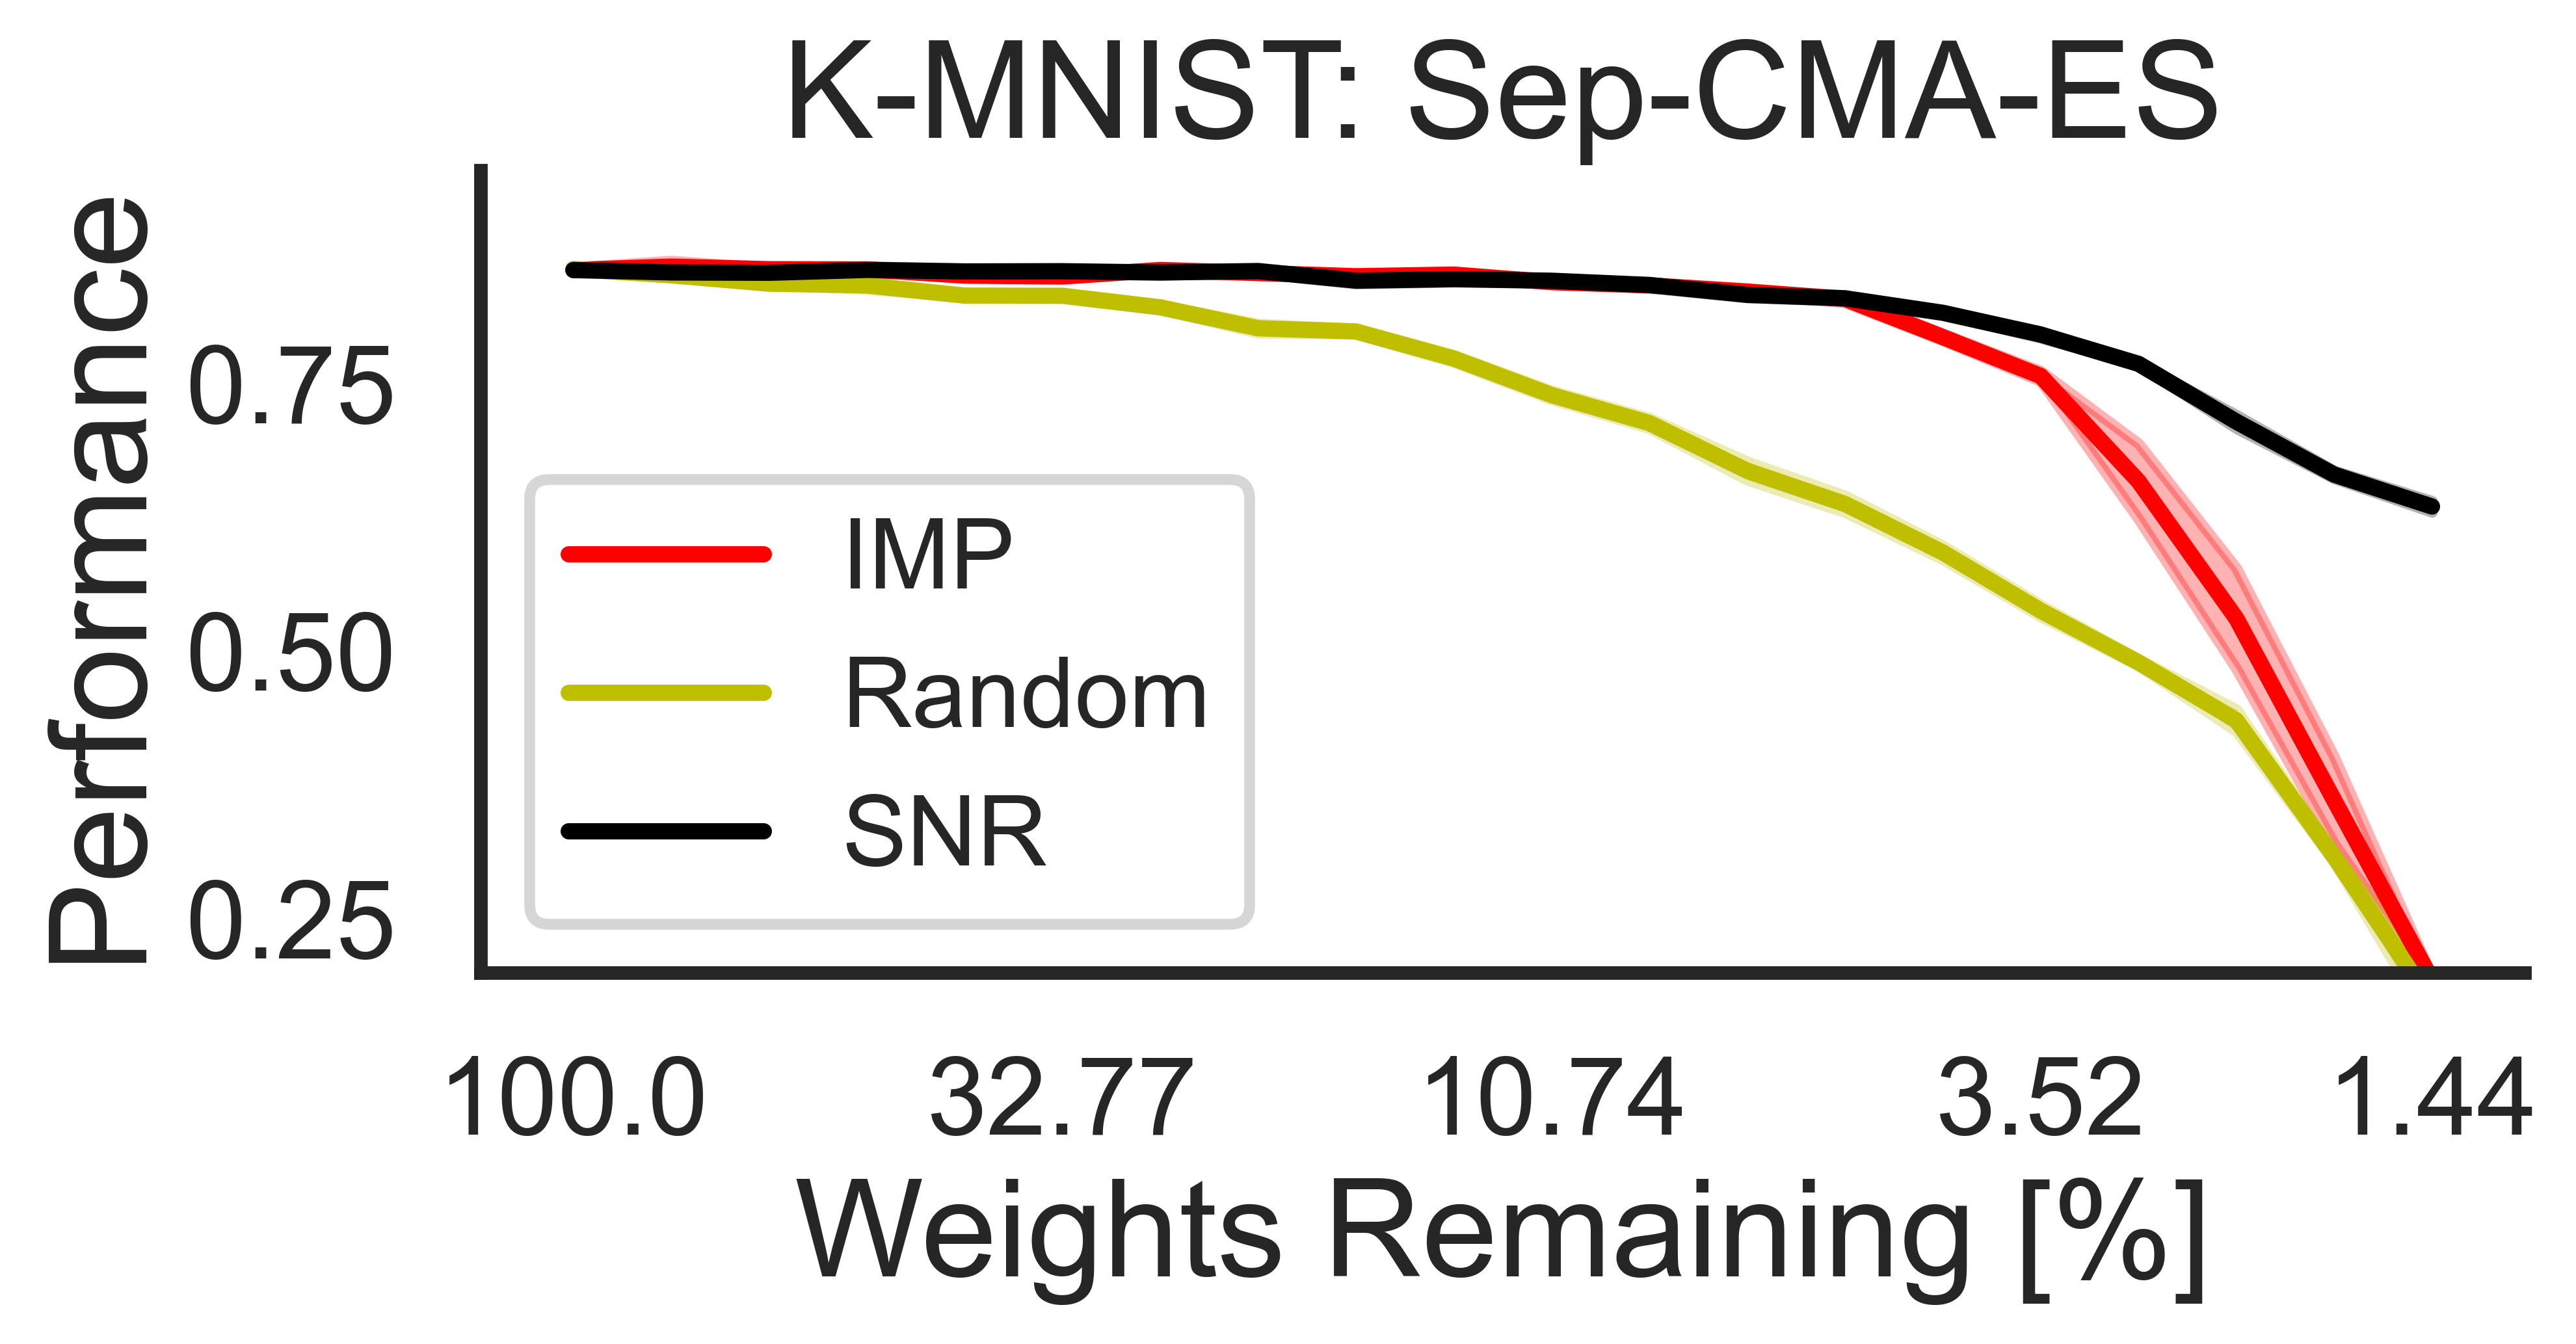

In [5]:
meta_log, hyper_log = load_result_logs(f"../experiments/rebuttal/kmnist_sepcma")
results = get_perf_env(meta_log, hyper_log)

fig, ax = imp_plot(results,
        num_imp_iters=20,
        plot_title="K-MNIST: Sep-CMA-ES",
        curve_labels=list(results.keys()),
        colors=["r", "y", "black"],
        # fig=fig, ax=axs.flatten()[i],
        plot_legend=True,
        plot_ylabel=True,
        plot_xlabel=True)
ax.set_ylim(0.2, 0.95)

# PPO Random Baseline

[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]


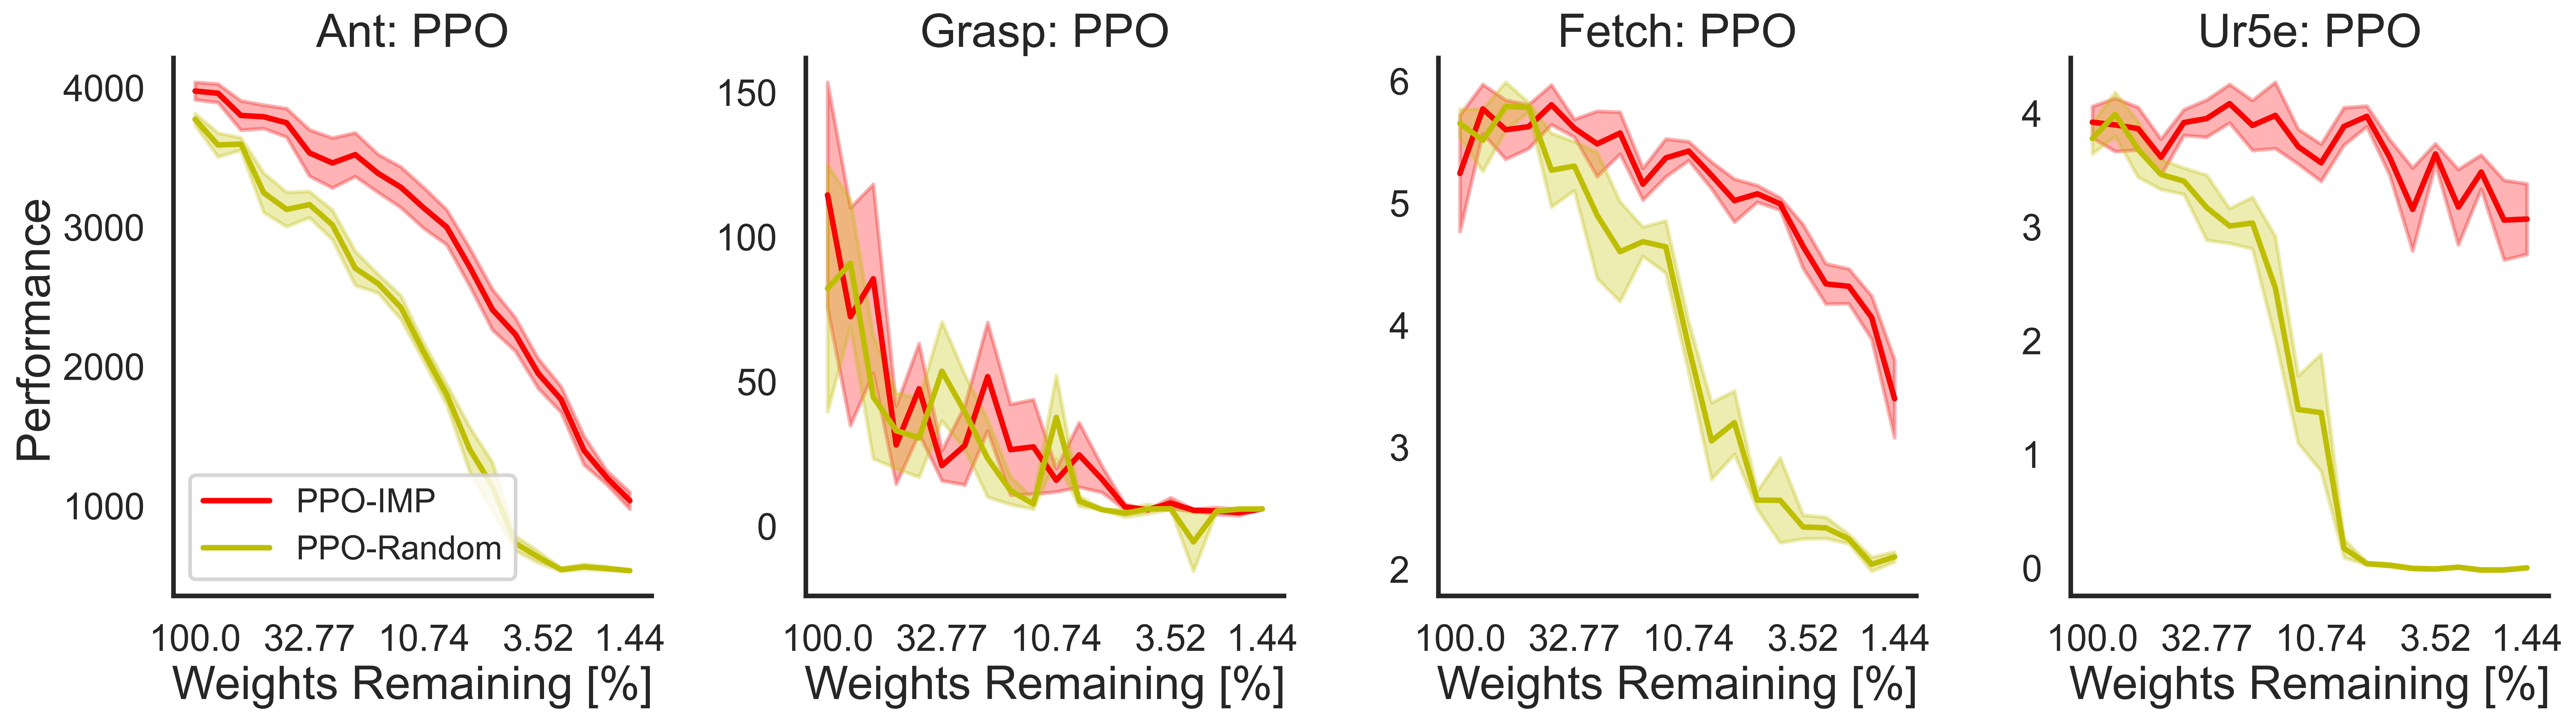

In [11]:
def get_perf_env(meta_log_gd, hyper_log_gd, meta_log_random, hyper_log_random, env_name):
    """Filter dataframe for environment and popsize."""
    run_id_ticket = hyper_log_gd.filter({"imp_config/baseline_name": "final-ticket"}).run_id.iloc[0]
    run_id_random = hyper_log_random.filter({"env_name": env_name}).run_id.iloc[0]
    
    ticket_perf = meta_log_gd[run_id_ticket].stats.final_perf
    random_perf = meta_log_random[run_id_random].stats.final_perf
    return {"PPO-IMP": ticket_perf, "PPO-Random": random_perf}

labels = ["Ant: PPO", "Grasp: PPO", "Fetch: PPO", "Ur5e: PPO"]
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
for i, env_name in enumerate(["ant", "grasp", "fetch", "ur5e"]):
    meta_log_gd, hyper_log_gd = load_result_logs(f"../experiments/sgd/{env_name}")
    if env_name in ["ant", "grasp"]:
        meta_log_random, hyper_log_random = load_result_logs(f"../experiments/rebuttal/ppo_random")
    else:
        meta_log_random, hyper_log_random = load_result_logs(f"../experiments/rebuttal/ppo_random_2")
    results = get_perf_env(meta_log_gd, hyper_log_gd, meta_log_random, hyper_log_random, env_name)

    imp_plot(results,
            num_imp_iters=20,
            plot_title=labels[i],
            curve_labels=list(results.keys()),
            colors=["r", "y"],
            # colors=["r", "orange", "yellow", "b", "g"],
            fig=fig, ax=axs.flatten()[i],
            plot_legend=i==0,
            plot_ylabel=i==0,
            plot_xlabel=True)

# CIFAR-10: Lottery Tickets with SGD

[100.0, 32.77, 10.74, 3.52, 1.44]


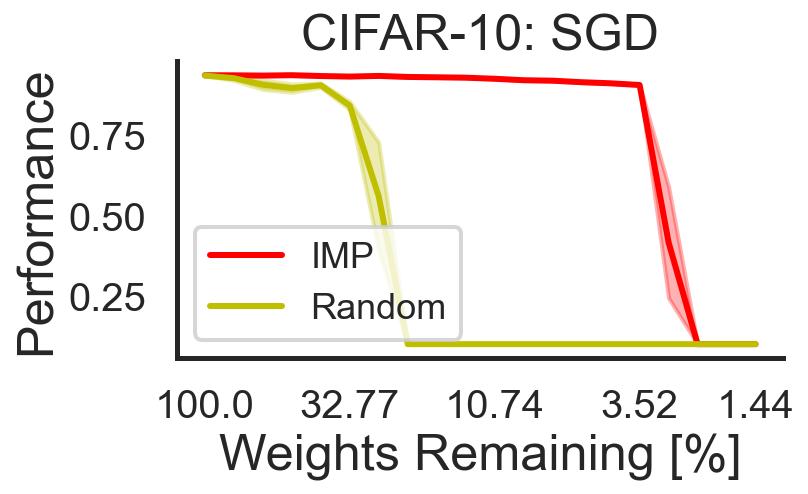

In [8]:
def get_perf_env(meta_log, hyper_log):
    """Filter dataframe for environment and popsize."""
    run_id_ticket = hyper_log.filter({"imp_config/baseline_name": "final-ticket"}).run_id.iloc[0]
    run_id_random = hyper_log.filter({"imp_config/baseline_name": "random-reinit"}).run_id.iloc[0]
    ticket_perf = meta_log[run_id_ticket].stats.final_perf
    random_perf = meta_log[run_id_random].stats.final_perf
    return {"IMP": ticket_perf, "Random": random_perf}

meta_log, hyper_log = load_result_logs(f"../experiments/rebuttal/cifar10")
results = get_perf_env(meta_log, hyper_log)

fig, ax = imp_plot(results,
        num_imp_iters=20,
        plot_title="CIFAR-10: SGD",
        curve_labels=list(results.keys()),
        colors=["r", "y"],
        # fig=fig, ax=axs.flatten()[i],
        plot_legend=True,
        plot_ylabel=True,
        plot_xlabel=True)
# ax.set_ylim(0.2, 0.95)

# SNIP and GRaSP Pruning-At-Init Baselines

In [9]:
meta_log, hyper_log = load_result_logs(f"../experiments/rebuttal/snip")
hyper_log

  env_name imp_config/baseline_name  time_elapsed      run_id  final_perf                                          log_paths                   experiment_dir                                     config_fname                                         model_ckpt                                     seeds model_type                                          log_fname
0    mnist                     snip   9247.384914  b_1_eval_0     0.98856  [experiments/sgd/snip/b_1_eval_0/logs/log_seed...  experiments/sgd/snip/b_1_eval_0  experiments/sgd/snip/b_1_eval_0/b_1_eval_0.yaml  [experiments/sgd/snip/b_1_eval_0/models/final/...  [176588, 363028, 381632, 562958, 924197]        jax  experiments/sgd/snip/b_1_eval_0/logs/b_1_eval_...
1   fmnist                     snip   9247.384914  b_1_eval_1     0.89388  [experiments/sgd/snip/b_1_eval_1/logs/log_seed...  experiments/sgd/snip/b_1_eval_1  experiments/sgd/snip/b_1_eval_1/b_1_eval_1.yaml  [experiments/sgd/snip/b_1_eval_1/models/final/...  [176588, 363028, 

In [10]:
def get_perf_env(meta_log_es, hyper_log_es,
                 meta_log_ot, hyper_log_ot,
                 meta_log_gd, hyper_log_gd,
                 es_main, es_other,
                 no_gd=False, plot_other=True):
    """Filter dataframe for environment and popsize."""
    results = {}
    run_id_es = hyper_log_es.filter({"imp_config/baseline_name": "sig2noise"}).run_id.iloc[0]
    es_perf = meta_log_es[run_id_es].stats.final_perf
    results["ES-SNR"] = es_perf

    myKeys = list(results.keys())
    myKeys.sort()
    results = {i: results[i] for i in myKeys}
    if not no_gd:
        gd_perf = meta_log_gd["b_1_eval_0"].stats.final_perf
        results["GD-IMP"] = gd_perf
    
    if plot_other:
        run_id_es = hyper_log_ot.filter({"env_name": es_other}).run_id.iloc[0]
        es_perf = meta_log_ot[run_id_es].stats.final_perf
        results["GD-SNIP"] = es_perf
    return results

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]


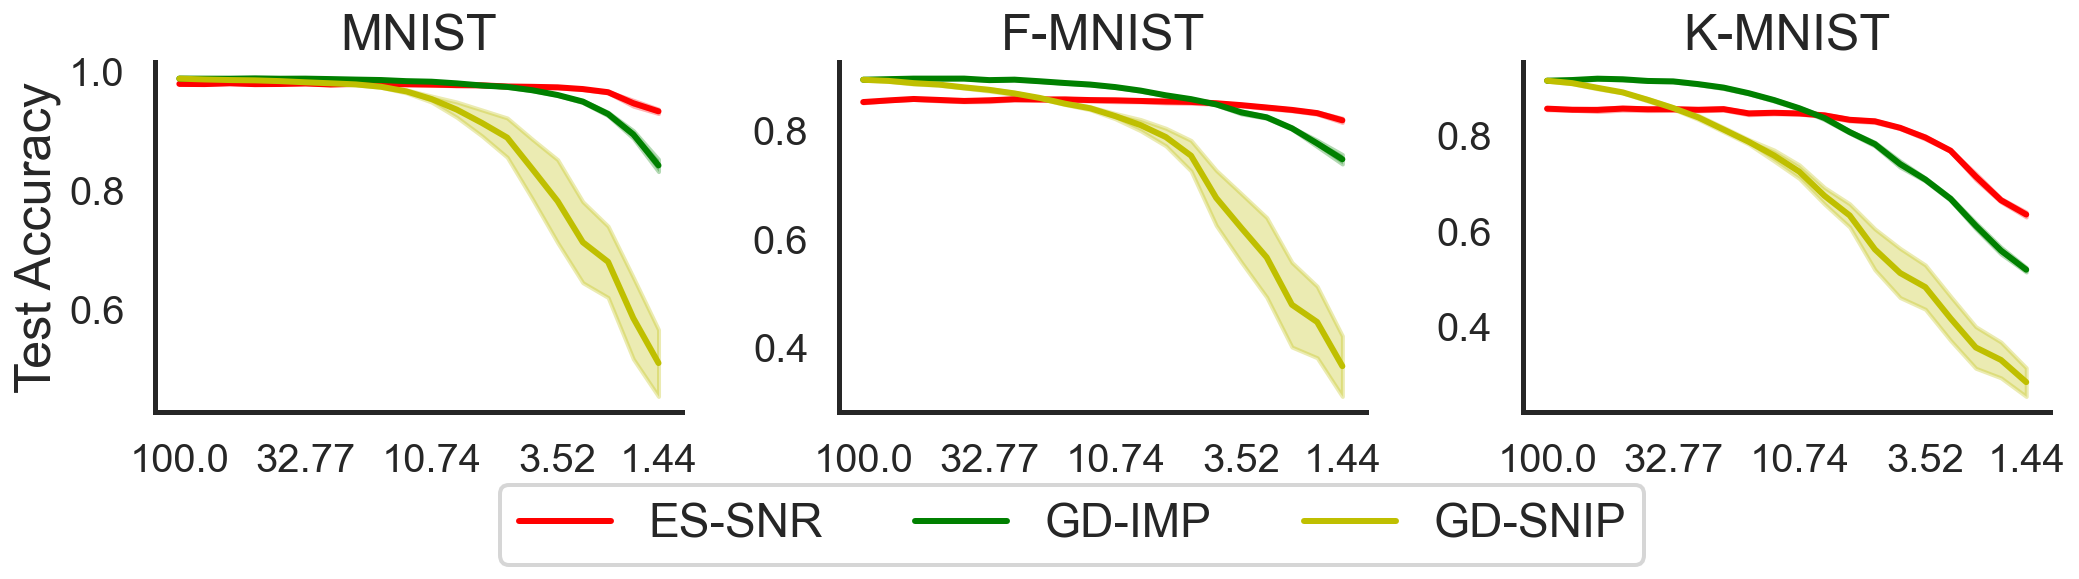

In [11]:
figsize = (15, 4)
fig, axs = plt.subplots(1, 3, figsize=figsize)
labels = ['MNIST', 'F-MNIST', 'K-MNIST']

env_names = ["mnist", "fmnist", "kmnist"]
for i, env_strat in enumerate([
                               'mnist_sepcma',
                               'fmnist_snes',
                               'kmnist_pgpe'
                               ]):
    split_env = env_strat.split("_")
    meta_log_es, hyper_log_es = load_result_logs(f"../experiments/blines/{env_strat}")
    if env_strat == "kmnist_pgpe":
        meta_log_es, hyper_log_es = load_result_logs(f"../experiments/rebuttal/kmnist_sepcma")

    meta_log_ot, hyper_log_ot = load_result_logs(f"../experiments/rebuttal/snip")
    meta_log_gd, hyper_log_gd = load_result_logs(f"../experiments/sgd/{split_env[0]}")
    if split_env[1] == "sepcma":
        es_main = "Sep_CMA_ES"
        es_other = env_names[i]
    elif split_env[1] == "snes":
        es_main = "SNES"
        es_other = env_names[i]
    elif split_env[1] == "pgpe":
        es_main = "PGPE"
        es_other = env_names[i]
    results = get_perf_env(meta_log_es, hyper_log_es,
                           meta_log_ot, hyper_log_ot,
                           meta_log_gd, hyper_log_gd,
                           es_main, es_other, plot_other=True)
    plot_legend = i == 7
    plot_ylabel = i in [0, 4, 8]
    plot_xlabel = i in [8, 9, 10, 11]
    imp_plot(results,
            num_imp_iters=20,
            plot_title=labels[i],
            curve_labels=list(results.keys()),
            colors=["r", "g", "y"],
            # colors=["r", "orange", "yellow", "b", "g"],
            fig=fig, ax=axs.flatten()[i],
            ylabel="Test Accuracy",
            plot_legend=False,
            plot_ylabel=plot_ylabel,
            plot_xlabel=plot_xlabel)
handles, labels = axs.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.25, -0.1), ncol=3, bbox_to_anchor=(0.25, -0.05))

# Mask-Reinit Experiments

In [12]:
meta_log, hyper_log = load_result_logs(f"../experiments/rebuttal/mnist_mask")
hyper_log

  env_name imp_config/baseline_name strategy_name  time_elapsed      run_id  final_perf                                          log_paths                               experiment_dir                                       config_fname                                         model_ckpt                                     seeds model_type                                          log_fname
0    mnist              mask-reinit    Sep_CMA_ES  23604.573211  b_1_eval_0     0.97900  [experiments/rebuttals/mnist_mask/b_1_eval_0/l...  experiments/rebuttals/mnist_mask/b_1_eval_0  experiments/rebuttals/mnist_mask/b_1_eval_0/b_...  [experiments/rebuttals/mnist_mask/b_1_eval_0/m...  [176588, 363028, 381632, 562958, 924197]        jax  experiments/rebuttals/mnist_mask/b_1_eval_0/lo...
1   kmnist              mask-reinit    Sep_CMA_ES  23604.573211  b_1_eval_1     0.85696  [experiments/rebuttals/mnist_mask/b_1_eval_1/l...  experiments/rebuttals/mnist_mask/b_1_eval_1  experiments/rebuttals/mnist_mask/b_

In [22]:
def get_perf_env(meta_log, hyper_log, meta_log_mask, hyper_log_mask, env_name):
    """Filter dataframe for environment and popsize."""
    run_id_ticket = hyper_log.filter({"imp_config/baseline_name": "final-ticket"}).run_id.iloc[0]
    run_id_random = hyper_log.filter({"imp_config/baseline_name": "random-reinit"}).run_id.iloc[0]
    run_id_sig2noi = hyper_log.filter({"imp_config/baseline_name": "sig2noise"}).run_id.iloc[0]
    run_id_mask = hyper_log_mask.filter({"imp_config/baseline_name": "mask-reinit",
                                         "env_name": env_name}).run_id.iloc[0]
    ticket_perf = meta_log[run_id_ticket].stats.final_perf
    random_perf = meta_log[run_id_random].stats.final_perf
    sig2noise_perf = meta_log[run_id_sig2noi].stats.final_perf
    mask_perf = meta_log_mask[run_id_mask].stats.final_perf
    return {"IMP": ticket_perf, "Random-Reinit": random_perf,
            "SNR": sig2noise_perf, "Mask-Reinit": mask_perf}

[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]


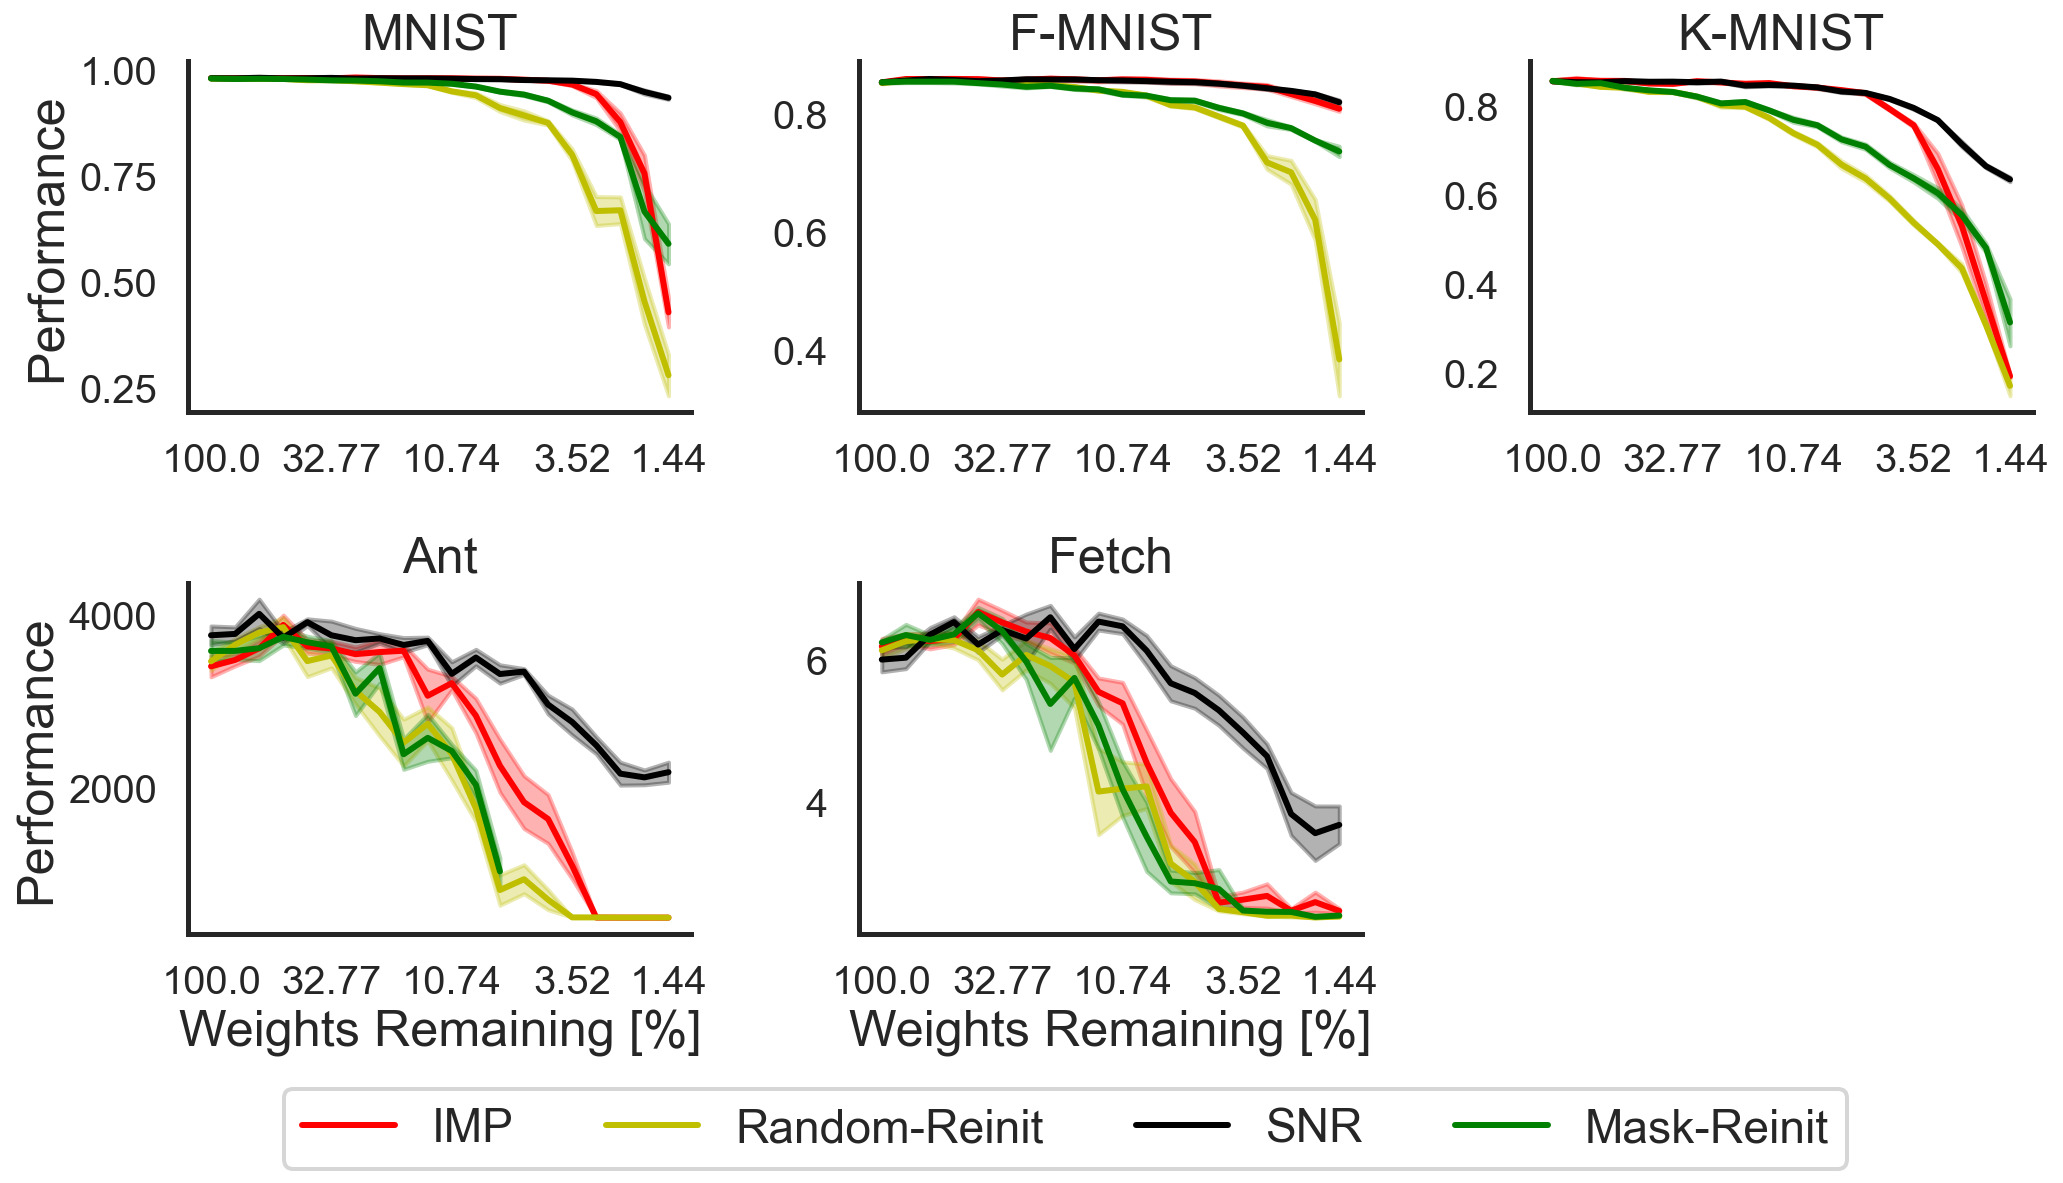

In [25]:
figsize = (15, 8)
fig, axs = plt.subplots(2, 3, figsize=figsize)
labels = [
    'MNIST', 'F-MNIST', 'K-MNIST', 'Ant', 'Fetch'
]
env_names = ["mnist", "fmnist", "kmnist", "ant", "fetch"]
for i, env_strat in enumerate(['mnist_sepcma', 'fmnist_snes', 'kmnist_sepcma',
                               'ant_sepcma', 'fetch_snes']):
    if env_strat == "kmnist_sepcma":
        meta_log, hyper_log = load_result_logs(f"../experiments/rebuttal/kmnist_sepcma")
    else:
        meta_log, hyper_log = load_result_logs(f"../experiments/blines/{env_strat}")
    if env_strat == "kmnist_sepcma":
        meta_log_mask, hyper_log_mask = load_result_logs(f"../experiments/rebuttal/mnist_mask")
    elif env_strat == "mnist_sepcma":
        meta_log_mask, hyper_log_mask = load_result_logs(f"../experiments/rebuttal/mnist_mask")
    elif env_strat == "fmnist_snes":
        meta_log_mask, hyper_log_mask = load_result_logs(f"../experiments/rebuttal/fmnist_mask")
    elif env_strat == "ant_sepcma":
        meta_log_mask, hyper_log_mask = load_result_logs(f"../experiments/rebuttal/ant_mask")
    elif env_strat == "fetch_snes":
        meta_log_mask, hyper_log_mask = load_result_logs(f"../experiments/rebuttal/fetch_mask")
    
    results = get_perf_env(meta_log, hyper_log, meta_log_mask, hyper_log_mask, env_names[i])
    plot_legend = i == 7
    plot_ylabel = i in [0, 3, 8]
    plot_xlabel = i in [3, 4, 5]

    imp_plot(results,
            num_imp_iters=20,
            plot_title=labels[i],
            curve_labels=list(results.keys()),
            colors=["r", "y", "black", "g"],
            fig=fig, ax=axs.flatten()[i],
            plot_legend=False,
            plot_ylabel=plot_ylabel,
            plot_xlabel=plot_xlabel)

axs.flatten()[5].axis('off')
handles, labels = axs.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.15, -0.1), ncol=4, bbox_to_anchor=(0.15, -0.05))
# fig.tight_layout()
